In [139]:
import pandas as pd
import json

# Function to load CSV data
def load_csv(file_path):
    return pd.read_csv(file_path)

# Function to load JSON data
def load_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return pd.json_normalize(data)


# Function to load Excel data
def load_excel(file_path, sheet_name=None):
    return pd.read_excel(file_path, sheet_name=sheet_name)

In [141]:
# Example file paths
csv_data = load_csv('csv_data_iris.csv')
json_data = load_json('json_data_iris.json')
excel_data = load_excel('excel_data_iris.xlsx', sheet_name='Sheet1')


In [143]:
# Exploring data
print(csv_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   class              150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [145]:
print(json_data.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [147]:
print(excel_data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target   class  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [149]:
print(excel_data.columns)


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'class'],
      dtype='object')


In [195]:
# Filling missing values in CSV data using forward fill
csv_data.ffill(inplace=True)

# Dropping missing values in JSON data
json_data.dropna(inplace=True)

# Converting a column in Excel data to integer, replace 'ColumnName' with the correct name
excel_data['class'] = pd.to_numeric(excel_data['class'], errors='coerce')
excel_data['class'] = excel_data['class'].fillna(0).astype('int')





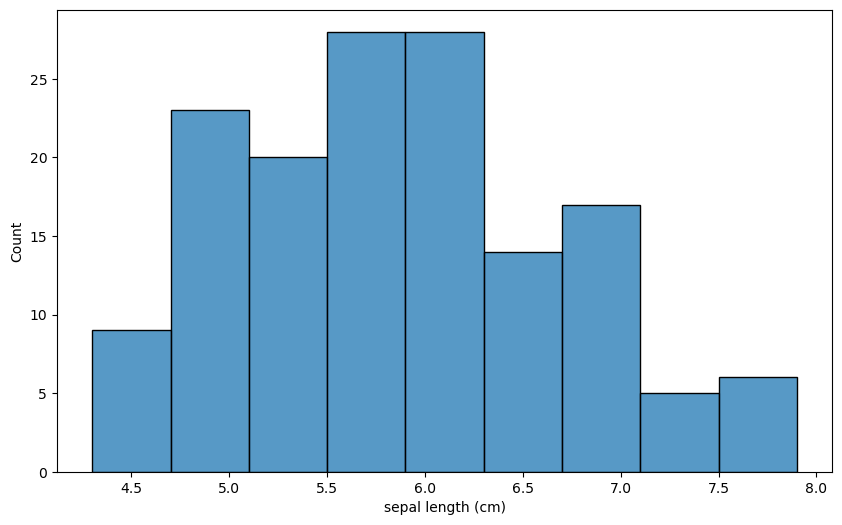

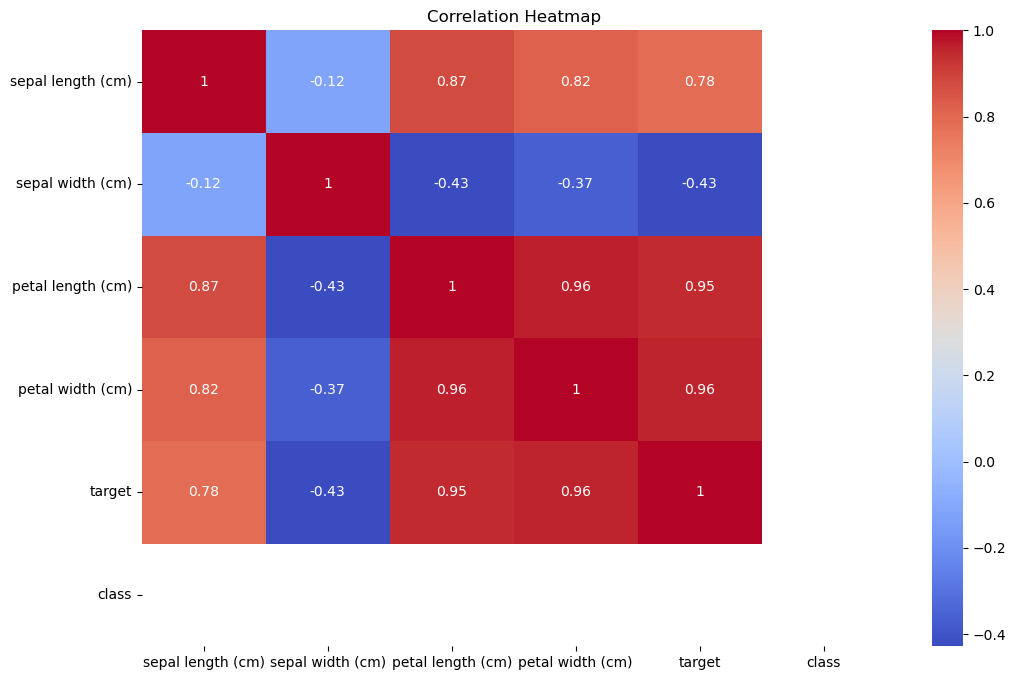

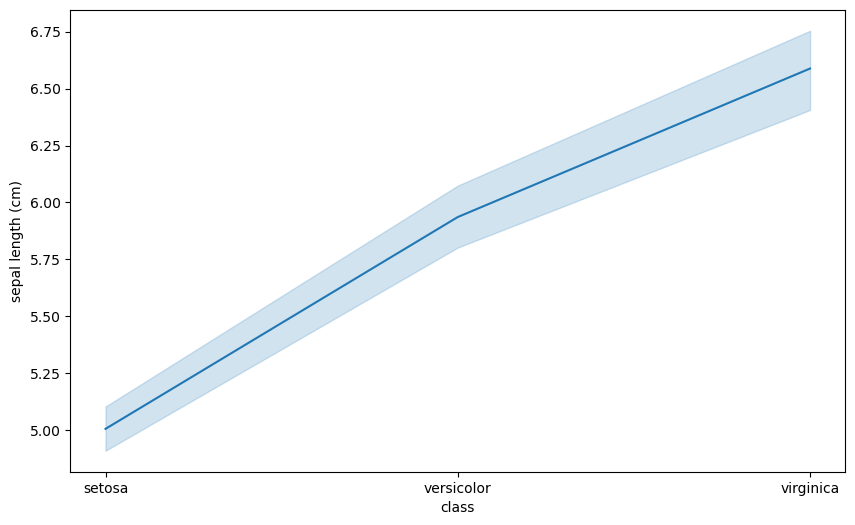

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualizing CSV data
plt.figure(figsize=(10, 6))
sns.histplot(csv_data['sepal length (cm)'])
plt.title('')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(excel_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Example: Line plot for JSON data
plt.figure(figsize=(10, 6))
sns.lineplot(data=json_data, x='class', y='sepal length (cm)')
plt.title('')
plt.show()
